$Atividade (2.5):$ Utilizando o conjunto de dados MNIST realize as seguintes atividades:
<ol>
    <li>Tente alcançar uma acurácia acima de 97% no conjunto de teste com KNeighborsClassifier, ajustando os hiperparâmetros 'weights' e 'n_neighbors' com o grid search </li>
    <li>Escreva uma função que modifique apenas as imagens de treinamento do dataset deslocando um pixel em de cada imagem em qualquer direção (esquerda, direita, para cima ou para baixo), ou seja, para cada imagem no conjunto de treinamento, quatro imagens deslocadas são criadas e as adicione ao conjunto de treinamento. Em seguida, treine seu melhor classificador com o novo conjunto aumentado. Finalmente, meça o desempenho do modelo através das métricas acurácia, precisão, revocação e F1-score. Dica: a função shift() do módulo scipy.ndimage.interpolation pode ser útil para deslocar o pixel. </li>
</ol>

## Importando as bibliotecas

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [5]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8) #transforma as labels de string para int

In [6]:
type(mnist)

sklearn.utils.Bunch

In [7]:
mnist.details

{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'description_version': '1',
 'format': 'ARFF',
 'creator': ['Yann LeCun', 'Corinna Cortes', 'Christopher J.C. Burges'],
 'upload_date': '2014-09-29T03:28:38',
 'language': 'English',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/52667/mnist_784.arff',
 'parquet_url': 'http://openml1.win.tue.nl/dataset554/dataset_554.pq',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['AzurePilot',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'minio_url': 'http://openml1.win.tue.nl/dataset554/dataset_554.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:12:09',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

In [8]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [9]:
mnist.data.shape

(70000, 784)

In [10]:
mnist.target.shape

(70000,)

In [11]:
X,y = mnist['data'], mnist['target']

In [12]:
type(X)

pandas.core.frame.DataFrame

In [16]:
X.iloc[15000]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 15000, Length: 784, dtype: float64

In [17]:
linha = X.iloc[15888]
digito = np.array(linha).reshape(28,28)

In [18]:
digito

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., 170., 217.,  79.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

## 2. Visualização dos dados

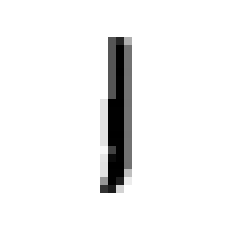

In [20]:
plt.imshow(digito, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [21]:
y[15888]

1

## 3. Pré-processamento

In [23]:
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]

In [24]:
print(X_test.shape, y_test.shape, X_train.shape, y_train.shape)

(10000, 784) (10000,) (60000, 784) (60000,)


In [25]:
index = np.random.permutation(60000)
X_train, y_train = X_train.iloc[index], y_train.iloc[index]

In [26]:
index = np.random.permutation(10000)
X_test, y_test = X_test.iloc[index], y_test.iloc[index]

## 4. Seleçao e treinamento do modelo

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
kn_clf = KNeighborsClassifier()
kn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
predictions = kn_clf.predict(X_test)

In [39]:
accuracy = sum(predictions == y_test)/len(predictions)

In [40]:
print(accuracy)

0.9688


In [41]:
accuracy_score(predictions,y_test)

0.9688

## 5. Ajustando o Modelo


In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
kn_clf = KNeighborsClassifier()
kn_clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [51]:
param_grid = { 
    'n_neighbors': [2, 3, 5, 7, 9, 11, 15, 20, 27],
    'weights': ['uniform','distance'],
    'n_jobs': [-1]
}

In [52]:
grid_search = GridSearchCV(kn_clf, param_grid, cv=5, scoring='accuracy')

In [53]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_jobs': [-1],
                         'n_neighbors': [2, 3, 5, 7, 9, 11, 15, 20, 27],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [54]:
grid_search.best_params_

{'n_jobs': -1, 'n_neighbors': 3, 'weights': 'distance'}

In [76]:
kn_clf_best = KNeighborsClassifier(n_neighbors=3, weights='distance', n_jobs=-1)
kn_clf_best.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3, weights='distance')

In [77]:
predictions = kn_clf_best.predict(X_test)

In [78]:
accuracy_score(predictions,y_test)

0.9717

### Escreva uma função que modifique apenas as imagens de treinamento do dataset deslocando um pixel em de cada imagem em qualquer direção (esquerda, direita, para cima ou para baixo), ou seja, para cada imagem no conjunto de treinamento, quatro imagens deslocadas são criadas e as adicione ao conjunto de treinamento. Em seguida, treine seu melhor classificador com o novo conjunto aumentado. Finalmente, meça o desempenho do modelo através das métricas acurácia, precisão, revocação e F1-score. Dica: a função shift() do módulo scipy.ndimage.interpolation pode ser útil para deslocar o pixel.

In [101]:
from scipy.ndimage import shift
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [102]:
def augment_dataset(X_train, y_train, dx, dy):
    X_train_augmented = []
    y_train_augmented = []

    for image, label in zip(X_train, y_train):
        # Adiciona a imagem original ao conjunto de treinamento aumentado
        X_train_augmented.append(image)
        y_train_augmented.append(label)

        # Desloca a imagem para a esquerda
        shifted_left = shift(image.reshape((28, 28)), [-dy, -dx], cval=0, mode="constant")
        X_train_augmented.append(shifted_left.flatten())
        y_train_augmented.append(label)

        # Desloca a imagem para a direita
        shifted_right = shift(image.reshape((28, 28)), [dy, dx], cval=0, mode="constant")
        X_train_augmented.append(shifted_right.flatten())
        y_train_augmented.append(label)

        # Desloca a imagem para cima
        shifted_up = shift(image.reshape((28, 28)), [-dx, dy], cval=0, mode="constant")
        X_train_augmented.append(shifted_up.flatten())
        y_train_augmented.append(label)

        # Desloca a imagem para baixo
        shifted_down = shift(image.reshape((28, 28)), [dx, -dy], cval=0, mode="constant")
        X_train_augmented.append(shifted_down.flatten())
        y_train_augmented.append(label)

    # Retorna o conjunto de treinamento aumentado
    return np.array(X_train_augmented), np.array(y_train_augmented)

In [103]:
# Define os deslocamentos desejados (um pixel em cada direção)
dx = 1
dy = 1

In [105]:
# Modifica o conjunto de treinamento
X_train_augmented, y_train_augmented = augment_dataset(X_train.to_numpy(), y_train, dx, dy)

In [106]:
# Treina o classificador com o conjunto de treinamento aumentado
kn_clf_best_augmented = KNeighborsClassifier(n_neighbors=3, weights='distance', n_jobs=-1)
kn_clf_best_augmented.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3, weights='distance')

In [107]:
# Realiza previsões no conjunto de teste
predictions_augmented = kn_clf_best_augmented.predict(X_test)

C:\Users\socia\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [108]:
# Mede o desempenho do modelo com base em métricas
accuracy_augmented = accuracy_score(y_test, predictions_augmented)
precision_augmented = precision_score(y_test, predictions_augmented, average='weighted')
recall_augmented = recall_score(y_test, predictions_augmented, average='weighted')
f1_score_augmented = f1_score(y_test, predictions_augmented, average='weighted')

In [109]:
# Imprime as métricas de desempenho
print("Accuracy:", accuracy_augmented)
print("Precision:", precision_augmented)
print("Recall:", recall_augmented)
print("F1-score:", f1_score_augmented)

Accuracy: 0.974
Precision: 0.9742193729346603
Recall: 0.974
F1-score: 0.9739830772641294


In [112]:
X_train_augmented.shape, y_train_augmented.shape

((300000, 784), (300000,))